In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('cubic_zirconia.csv')

In [3]:
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.shape

(26967, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [6]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [8]:
df.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,13484.000000,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [9]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


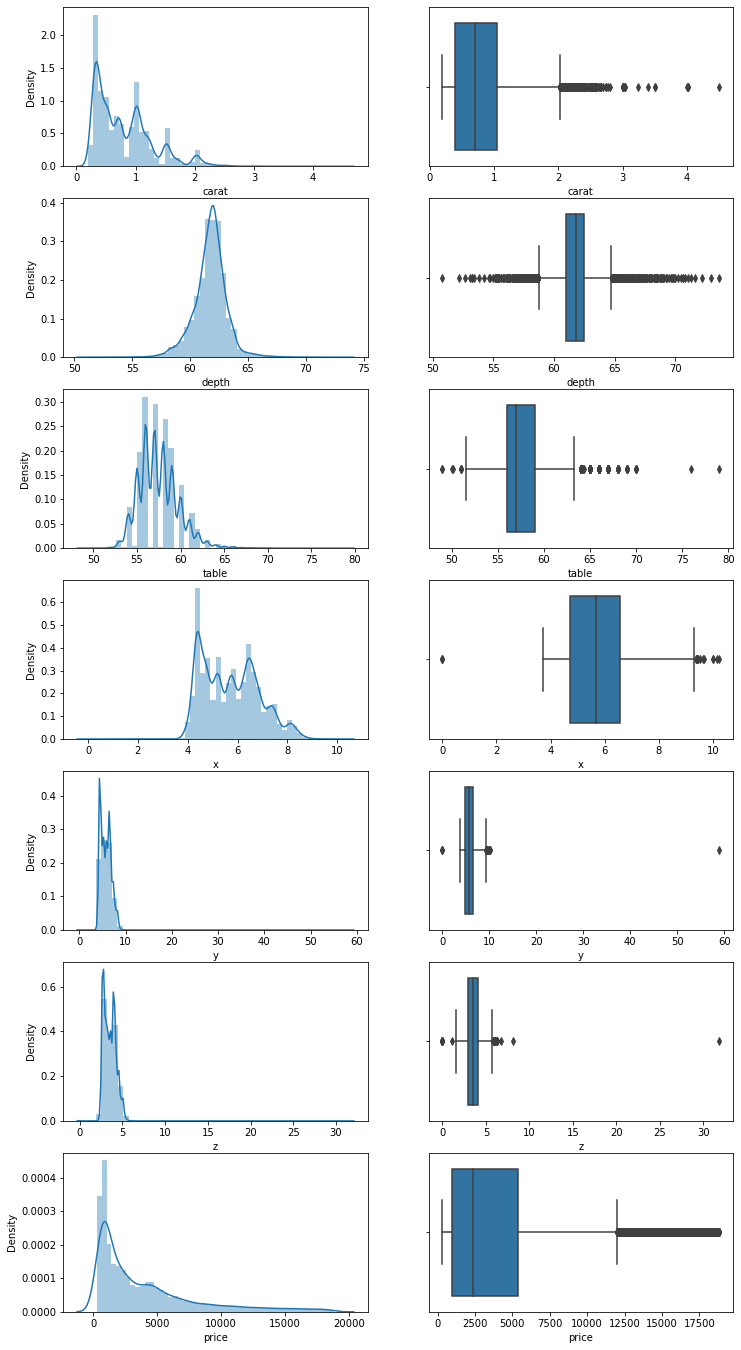

In [12]:
fig,axes=plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(12,24);

sns.distplot(df['carat'],ax=axes[0][0])
sns.boxplot(df['carat'],orient='H',ax=axes[0][1])

sns.distplot(df['depth'],ax=axes[1][0])
sns.boxplot(df['depth'],orient='H',ax=axes[1][1])

sns.distplot(df['table'],ax=axes[2][0])
sns.boxplot(df['table'],orient='H',ax=axes[2][1])

sns.distplot(df['x'],ax=axes[3][0])
sns.boxplot(df['x'],orient='H',ax=axes[3][1])

sns.distplot(df['y'],ax=axes[4][0])
sns.boxplot(df['y'],orient='H',ax=axes[4][1]);

sns.distplot(df['z'],ax=axes[5][0])
sns.boxplot(df['z'],orient='H',ax=axes[5][1])

sns.distplot(df['price'],ax=axes[6][0])
sns.boxplot(df['price'],orient='H',ax=axes[6][1]);


In [13]:
df.skew()

Unnamed: 0    0.000000
carat         1.116481
depth        -0.028618
table         0.765758
x             0.387986
y             3.850189
z             2.568257
price         1.618550
dtype: float64

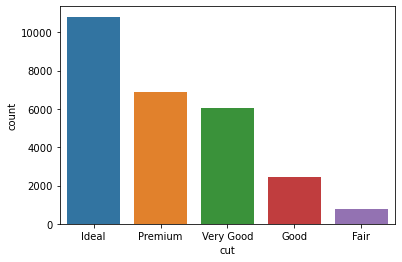

In [14]:
sns.countplot(df['cut']);

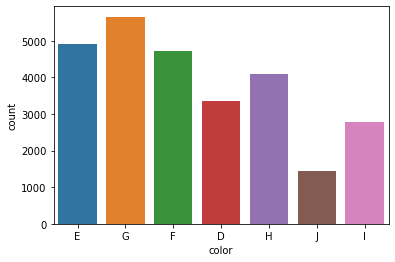

In [15]:
sns.countplot(df['color']);

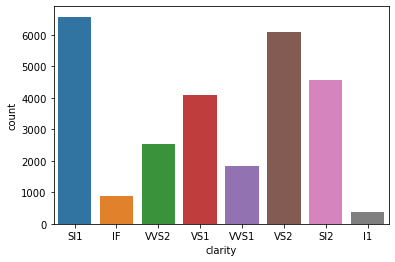

In [16]:
sns.countplot(df['clarity']);

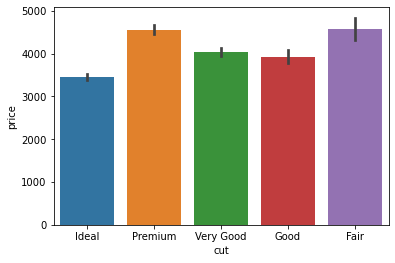

In [17]:
sns.barplot(data = df, x='cut',y='price');

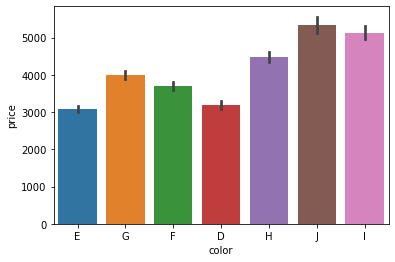

In [18]:
sns.barplot(data = df, x='color',y='price');

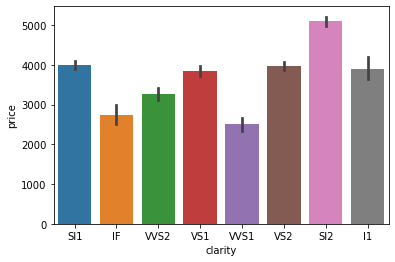

In [19]:
sns.barplot(data = df, x='clarity',y='price');

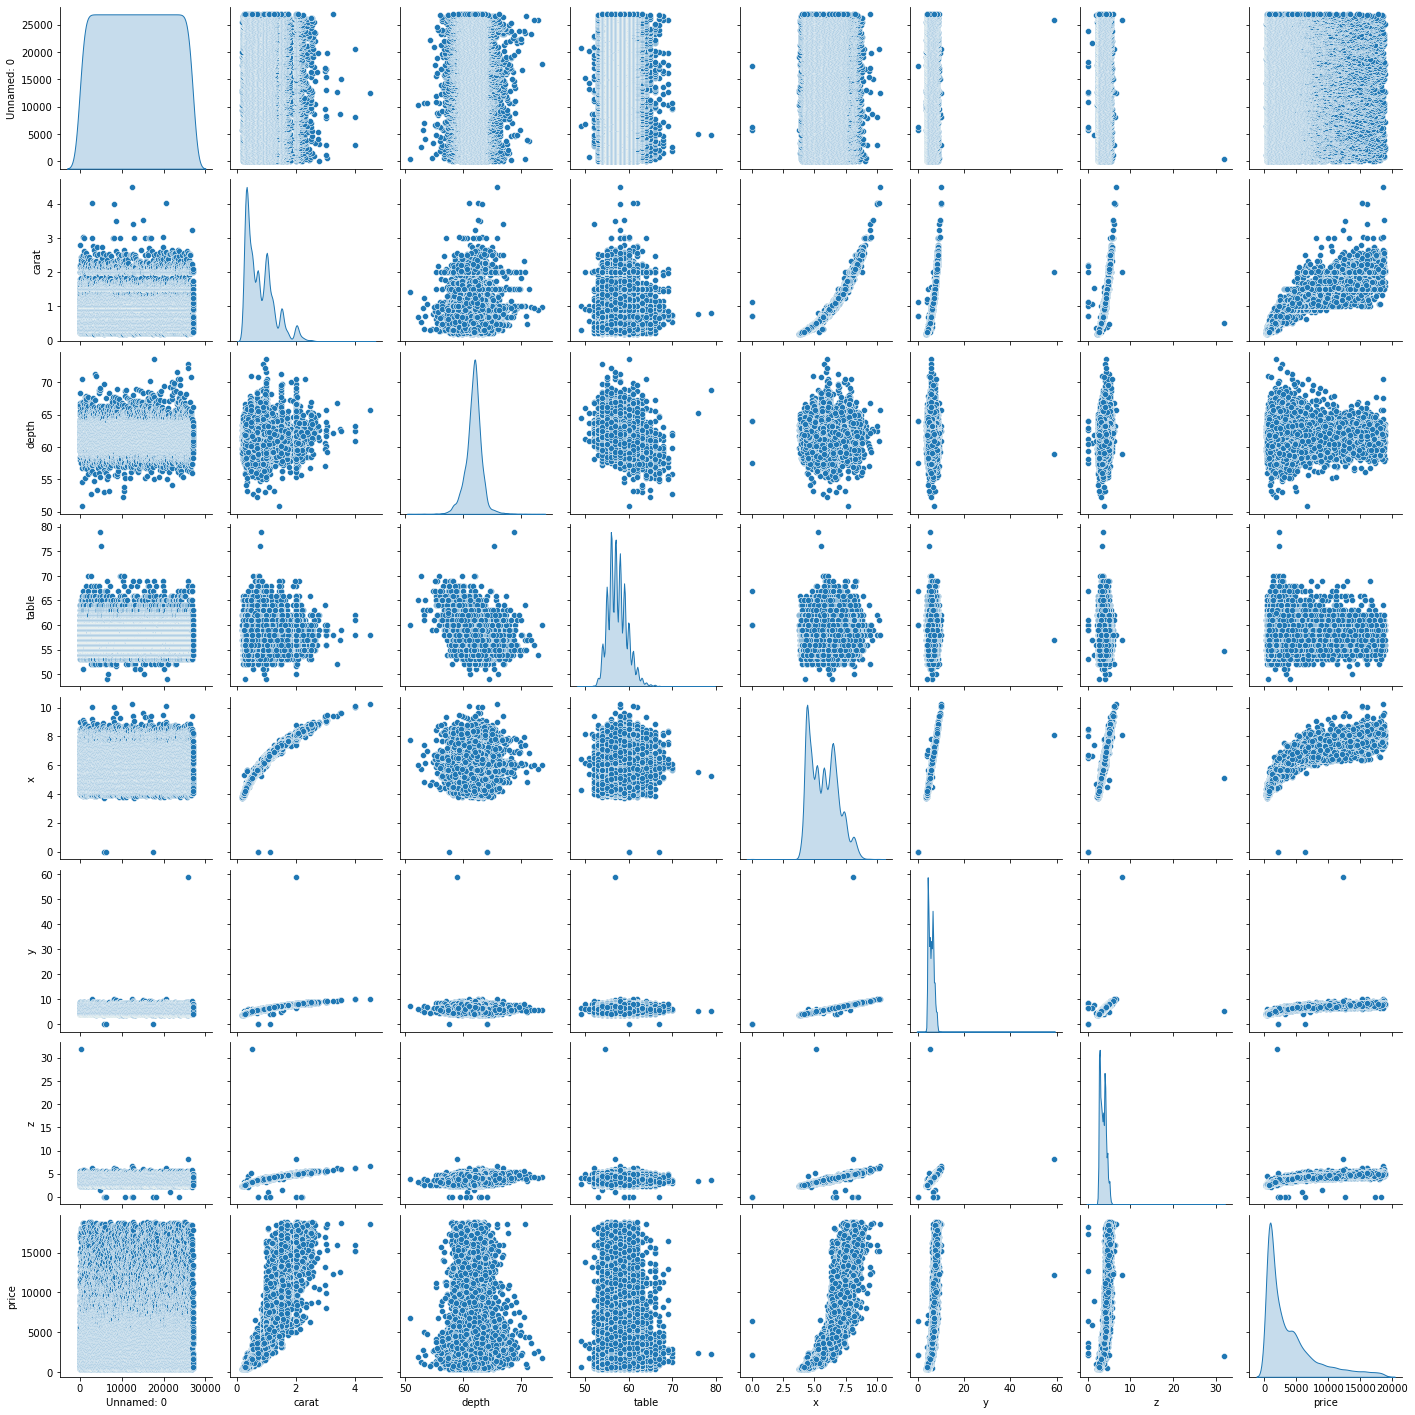

In [20]:
sns.pairplot(df,diag_kind='kde')  
plt.show()

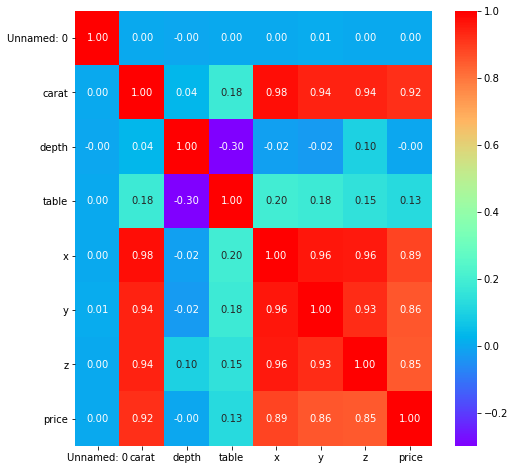

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow');

In [22]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()  

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [23]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [24]:

from sklearn.preprocessing import StandardScaler

numerical = df.select_dtypes(exclude=['object'])
df[numerical.columns] = StandardScaler().fit_transform(numerical)

In [25]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.731987,-1.043201,Ideal,E,SI1,0.254475,0.243689,-1.293628,-1.238014,-1.218491,-0.854832
1,-1.731858,-0.980405,Premium,G,IF,-0.677789,0.243689,-1.160708,-1.092221,-1.162983,-0.734329
2,-1.731730,0.212721,Very Good,E,VVS2,0.326187,1.139736,0.274832,0.331406,0.335747,0.583753
3,-1.731601,-0.792017,Ideal,F,VS1,-0.104088,-0.652358,-0.806254,-0.800635,-0.802177,-0.709979
4,-1.731473,-1.022269,Ideal,F,VVS1,-0.964639,0.691712,-1.222737,-1.117949,-1.232368,-0.785263


In [26]:
def remove_outlier (col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [27]:
for column in df[['carat','depth','table','x','y','z','price']].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

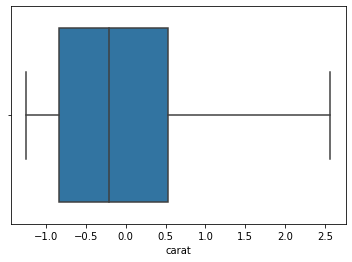

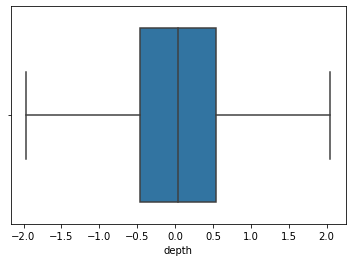

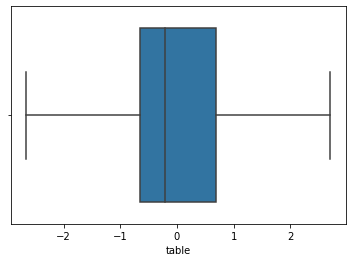

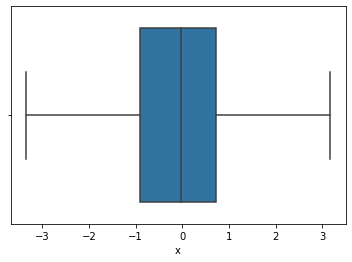

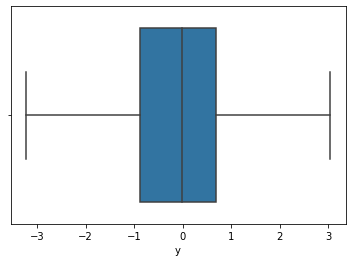

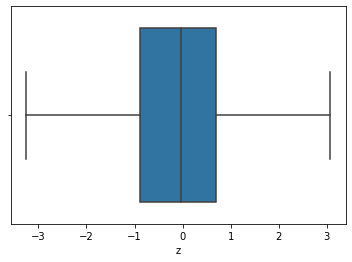

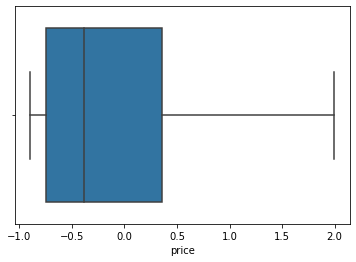

In [28]:
cols = ['carat' ,'depth', 'table', 'x', 'y','z','price']

for i in cols:
    sns.boxplot(df[i])
    plt.show()

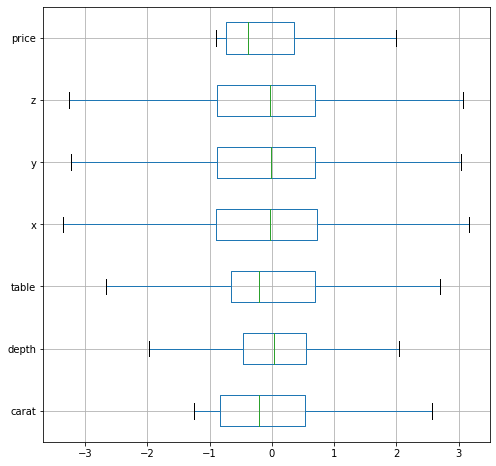

In [29]:
plt.figure(figsize=(8,8))
df[(cols)].boxplot(vert=0)
plt.show()

In [30]:
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,2.696700e+04,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,1.594914e-17,-0.010011,0.002824,-0.009131,0.000044,-0.001519,-0.001105,-0.050091
std,1.000019e+00,0.967962,0.874107,0.966443,0.998695,0.959636,0.967622,0.862377
min,-1.731987e+00,-1.252522,-1.968615,-2.668463,-3.349463,-3.231949,-3.258429,-0.897815
25%,-8.659933e-01,-0.833881,-0.462651,-0.652358,-0.903729,-0.877819,-0.885440,-0.744018
50%,0.000000e+00,-0.205920,0.039337,-0.204334,-0.035316,-0.020213,-0.025058,-0.388720
75%,8.659933e-01,0.526701,0.541325,0.691712,0.726761,0.691601,0.696552,0.352933
max,1.731987e+00,2.567575,2.047289,2.707817,3.172495,3.045731,3.069541,1.998361


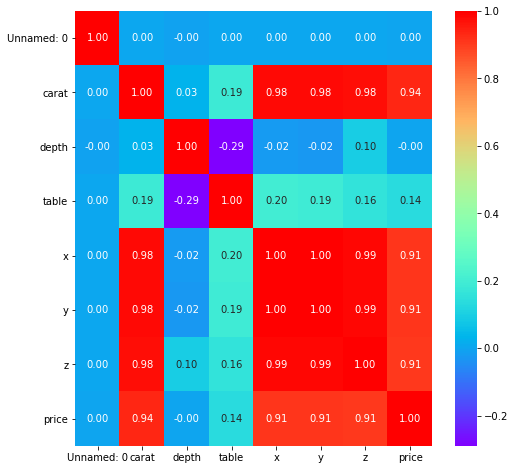

In [31]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow');

In [32]:
df=pd.get_dummies(df,columns=['cut','color','clarity'],drop_first=True)
df.head()

,Unnamed: 0,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.731987,-1.043201,0.254475,0.243689,-1.293628,-1.238014,-1.218491,-0.854832,0,1,...,0,0,0,0,1,0,0,0,0,0
1,-1.731858,-0.980405,-0.677789,0.243689,-1.160708,-1.092221,-1.162983,-0.734329,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.731730,0.212721,0.326187,1.139736,0.274832,0.331406,0.335747,0.583753,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-1.731601,-0.792017,-0.104088,-0.652358,-0.806254,-0.800635,-0.802177,-0.709979,0,1,...,0,0,0,0,0,0,1,0,0,0
4,-1.731473,-1.022269,-0.964639,0.691712,-1.222737,-1.117949,-1.232368,-0.785263,0,1,...,0,0,0,0,0,0,0,0,1,0


In [33]:
df.isnull().sum()

Unnamed: 0       0
carat            0
depth            0
table            0
x                0
y                0
z                0
price            0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
dtype: int64

In [34]:
df=df.apply(lambda x:x.fillna(x.mean()),axis=0)

In [35]:
df.isnull().sum().sum()

0

In [36]:
df1=df.drop(columns=['Unnamed: 0'],axis=1)

In [37]:
df1.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043201,0.254475,0.243689,-1.293628,-1.238014,-1.218491,-0.854832,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.980405,-0.677789,0.243689,-1.160708,-1.092221,-1.162983,-0.734329,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.212721,0.326187,1.139736,0.274832,0.331406,0.335747,0.583753,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.792017,-0.104088,-0.652358,-0.806254,-0.800635,-0.802177,-0.709979,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022269,-0.964639,0.691712,-1.222737,-1.117949,-1.232368,-0.785263,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [38]:
X = df1.drop('price',axis=1)
y=df1[['price']]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [40]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


LinearRegression()

In [41]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.086780148215858
The coefficient for depth is -0.005875950399465979
The coefficient for table is -0.012555714989848907
The coefficient for x is -0.3687294527403408
The coefficient for y is 0.2637778479690415
The coefficient for z is -0.019439444968085223
The coefficient for cut_Good is 0.09402956253566346
The coefficient for cut_Ideal is 0.15620925180550174
The coefficient for cut_Premium is 0.1505867277544861
The coefficient for cut_Very Good is 0.12532462386457213
The coefficient for color_E is -0.048421354641000246
The coefficient for color_F is -0.06721648039435818
The coefficient for color_G is -0.10483306249085562
The coefficient for color_H is -0.2097241317021764
The coefficient for color_I is -0.329127039110375
The coefficient for color_J is -0.4759660793355477
The coefficient for clarity_IF is 1.0079796651227293
The coefficient for clarity_SI1 is 0.648718817170941
The coefficient for clarity_SI2 is 0.44630258377667476
The coefficient for clarity_V

In [42]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.76943051543636


In [43]:
regression_model.score(X_train, y_train)

0.9408511725362039

In [44]:
regression_model.score(X_test, y_test)

0.940351720878591

In [45]:
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.2101860221069641

In [46]:
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.20954324304877975

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

In [49]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 31.78217228374219
depth ---> 2.832265730043202
table ---> 1.7722917489040528
x ---> 437.0773361411652
y ---> 428.2789368306612
z ---> 105.82753801456637
cut_Good ---> 3.589224353795378
cut_Ideal ---> 14.297271436530734
cut_Premium ---> 8.606284212865514
cut_Very Good ---> 7.818947700289891
color_E ---> 2.368845047250475


In [50]:
#STATS MODEL

In [51]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
11687,-0.812949,0.397900,-0.652358,-0.850560,-0.860667,-0.802177,0,1,0,0,...,1,0,0,0,0,0,0,0,1,-0.715197
9728,1.908216,0.756463,-0.204334,1.639481,1.557783,1.681828,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0.591455
1936,-0.980405,0.039337,2.035782,-1.178431,-1.100797,-1.107474,1,0,0,0,...,0,0,0,1,0,0,0,0,0,-0.845639
26220,-0.205920,0.756463,-0.204334,-0.106206,-0.063093,0.002696,0,0,0,1,...,0,0,0,1,0,0,0,0,0,-0.428723
18445,-0.205920,0.254475,-0.652358,-0.053038,-0.020213,-0.011181,0,1,0,0,...,0,0,0,0,1,0,0,0,0,-0.339028


In [52]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [53]:
data_test.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [54]:
data_train.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True)

In [55]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [56]:
data_test.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True)

In [57]:
data_test.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [58]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat + depth + table + x+ y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm1.params

Intercept       -0.769431
carat            1.086780
depth           -0.005876
table           -0.012556
x               -0.368729
y                0.263778
z               -0.019439
cut_Good         0.094030
cut_Ideal        0.156209
cut_Premium      0.150587
cut_Very_Good    0.125325
color_E         -0.048421
color_F         -0.067216
color_G         -0.104833
color_H         -0.209724
color_I         -0.329127
color_J         -0.475966
clarity_IF       1.007980
clarity_SI1      0.648719
clarity_SI2      0.446303
clarity_VS1      0.850392
clarity_VS2      0.782922
clarity_VVS1     0.958753
clarity_VVS2     0.950561
dtype: float64

In [59]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.304e+04
Date:                Mon, 17 May 2021   Prob (F-statistic):               0.00
Time:                        20:40:41   Log-Likelihood:                 2658.2
No. Observations:               18876   AIC:                            -5268.
Df Residuals:                   18852   BIC:                            -5080.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7694      0.016    -47.005

In [60]:
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [61]:
mse

0.044178163889149344

In [62]:
np.sqrt(lm1.mse_resid)

0.21031977078235542

In [63]:
y_pred = lm1.predict(data_test)

In [64]:
regression_model.score(X_test, y_test)

0.940351720878591

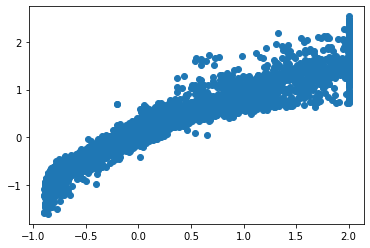

In [65]:
plt.scatter(y_test['price'], y_pred);


In [66]:

import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'price ~ carat  + table  + x + y+ cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm2.params

Intercept       -0.781460
carat            1.077463
table           -0.009189
x               -0.386694
y                0.272384
cut_Good         0.098654
cut_Ideal        0.168737
cut_Premium      0.162139
cut_Very_Good    0.133991
color_E         -0.048476
color_F         -0.067273
color_G         -0.105372
color_H         -0.210186
color_I         -0.329705
color_J         -0.476676
clarity_IF       1.011952
clarity_SI1      0.649952
clarity_SI2      0.447994
clarity_VS1      0.852722
clarity_VS2      0.784774
clarity_VVS1     0.961781
clarity_VVS2     0.953243
dtype: float64

In [67]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.427e+04
Date:                Mon, 17 May 2021   Prob (F-statistic):               0.00
Time:                        20:40:42   Log-Likelihood:                 2649.6
No. Observations:               18876   AIC:                            -5255.
Df Residuals:                   18854   BIC:                            -5083.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7815      0.016    -48.486

In [68]:
mse = np.mean((lm2.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [69]:
mse

0.04421859621953349

In [70]:
np.sqrt(lm2.mse_resid)

0.21040483164909268

In [71]:
y_pred = lm2.predict(data_test)

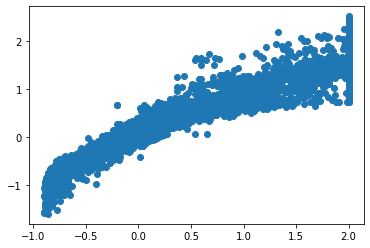

In [72]:

plt.scatter(y_test['price'], y_pred)

In [73]:
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.78) * Intercept + (1.08) * carat + (-0.01) * table + (-0.39) * x + (0.27) * y + (0.1) * cut_Good + (0.17) * cut_Ideal + (0.16) * cut_Premium + (0.13) * cut_Very_Good + (-0.05) * color_E + (-0.07) * color_F + (-0.11) * color_G + (-0.21) * color_H + (-0.33) * color_I + (-0.48) * color_J + (1.01) * clarity_IF + (0.65) * clarity_SI1 + (0.45) * clarity_SI2 + (0.85) * clarity_VS1 + (0.78) * clarity_VS2 + (0.96) * clarity_VVS1 + (0.95) * clarity_VVS2 + 